# Introduction

# 1. Load Modules, Data and Helper Functions

In [1]:
# Standard
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 9, 7
# Extras
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../artifacts/train.csv", na_values=-1)
test = pd.read_csv("../artifacts/test.csv", na_values=-1)
sample_submission = pd.read_csv("../artifacts/sample_submission.csv")

In [3]:
# Helper functions
# Show Data Info
def data_info(data, title):
    print(f"----- {title} Set -----")
    print("\n")
    display(train.head())
    print(f"{title} Samples: {data.shape[0]}")
    print(f"{title} Columns: {data.shape[1]}")
    print("\n")

# Plot Missing Values
def plot_missing(data, title):
    df_aux = data.isnull().sum()
    df_aux = df_aux[df_aux > 0] / train.shape[0] * 100
    df_aux = df_aux.sort_values()
    plt.rcParams['figure.figsize'] = 16, 9
    plt.xlim(right=100)
    plt.barh(df_aux.index, df_aux.values)
    plt.title(f"Missing Values ({title})")

# 2. Exploratory Data Analysis

In [4]:
data_info(train, "Train")
data_info(test, "Test")

----- Train Set -----




id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2            2.0          5            1.0   
1   9       0          1            1.0          7            0.0   
2  13       0          5            4.0          9            1.0   
3  16       0          0            1.0          2            0.0   
4  17       0          0            2.0          0            1.0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0            0.0              0              1              0  ...   
1            0.0              0              0              1  ...   
2            0.0              0              0              1  ...   
3            0.0              1              0              0  ...   
4            0.0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

Train Samples: 595212
Train Columns: 59


----- Test Set -----




id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2            2.0          5            1.0   
1   9       0          1            1.0          7            0.0   
2  13       0          5            4.0          9            1.0   
3  16       0          0            1.0          2            0.0   
4  17       0          0            2.0          0            1.0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0            0.0              0              1              0  ...   
1            0.0              0              0              1  ...   
2            0.0              0              0              1  ...   
3            0.0              1              0              0  ...   
4            0.0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

Test Samples: 892816
Test Columns: 58




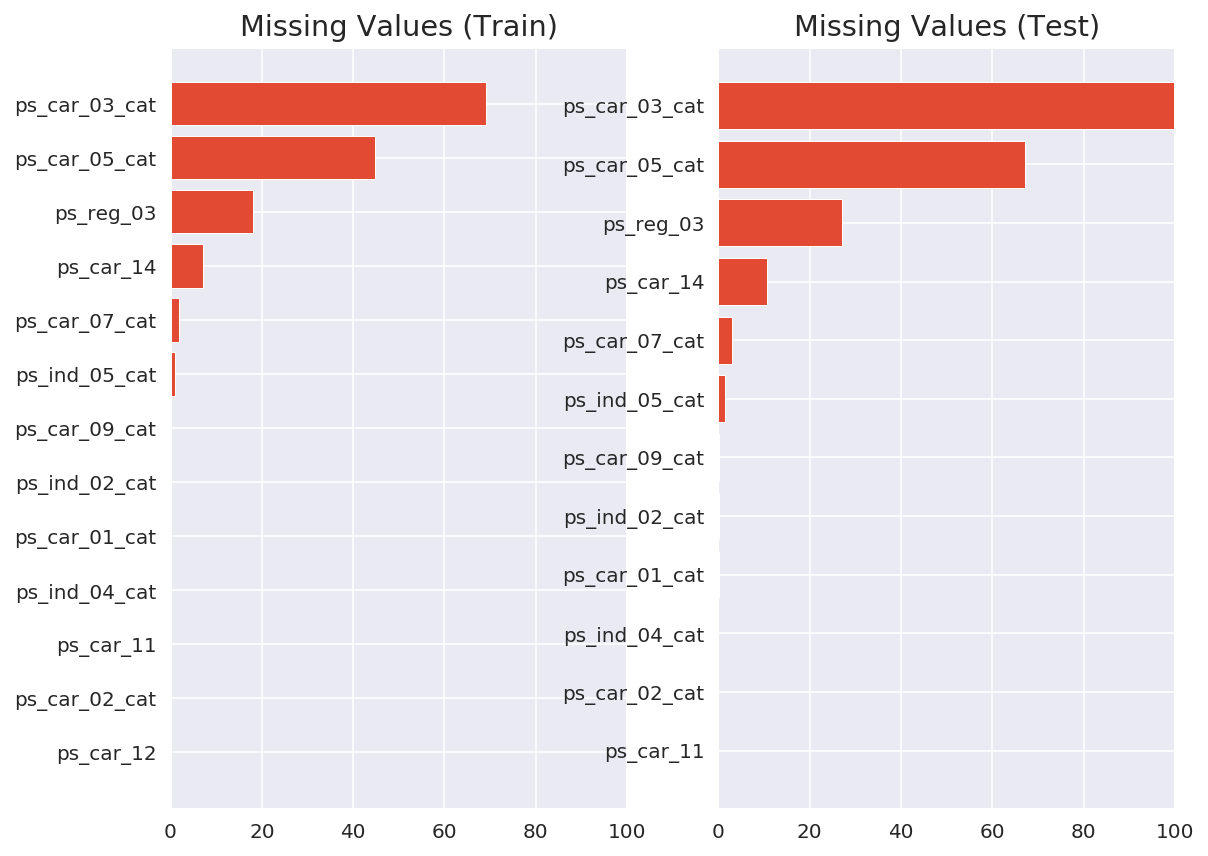

In [5]:
fig = plt.figure()
plt.subplot(1,2,1)
plot_missing(train, "Train")
plt.subplot(1,2,2)
plot_missing(test, "Test")

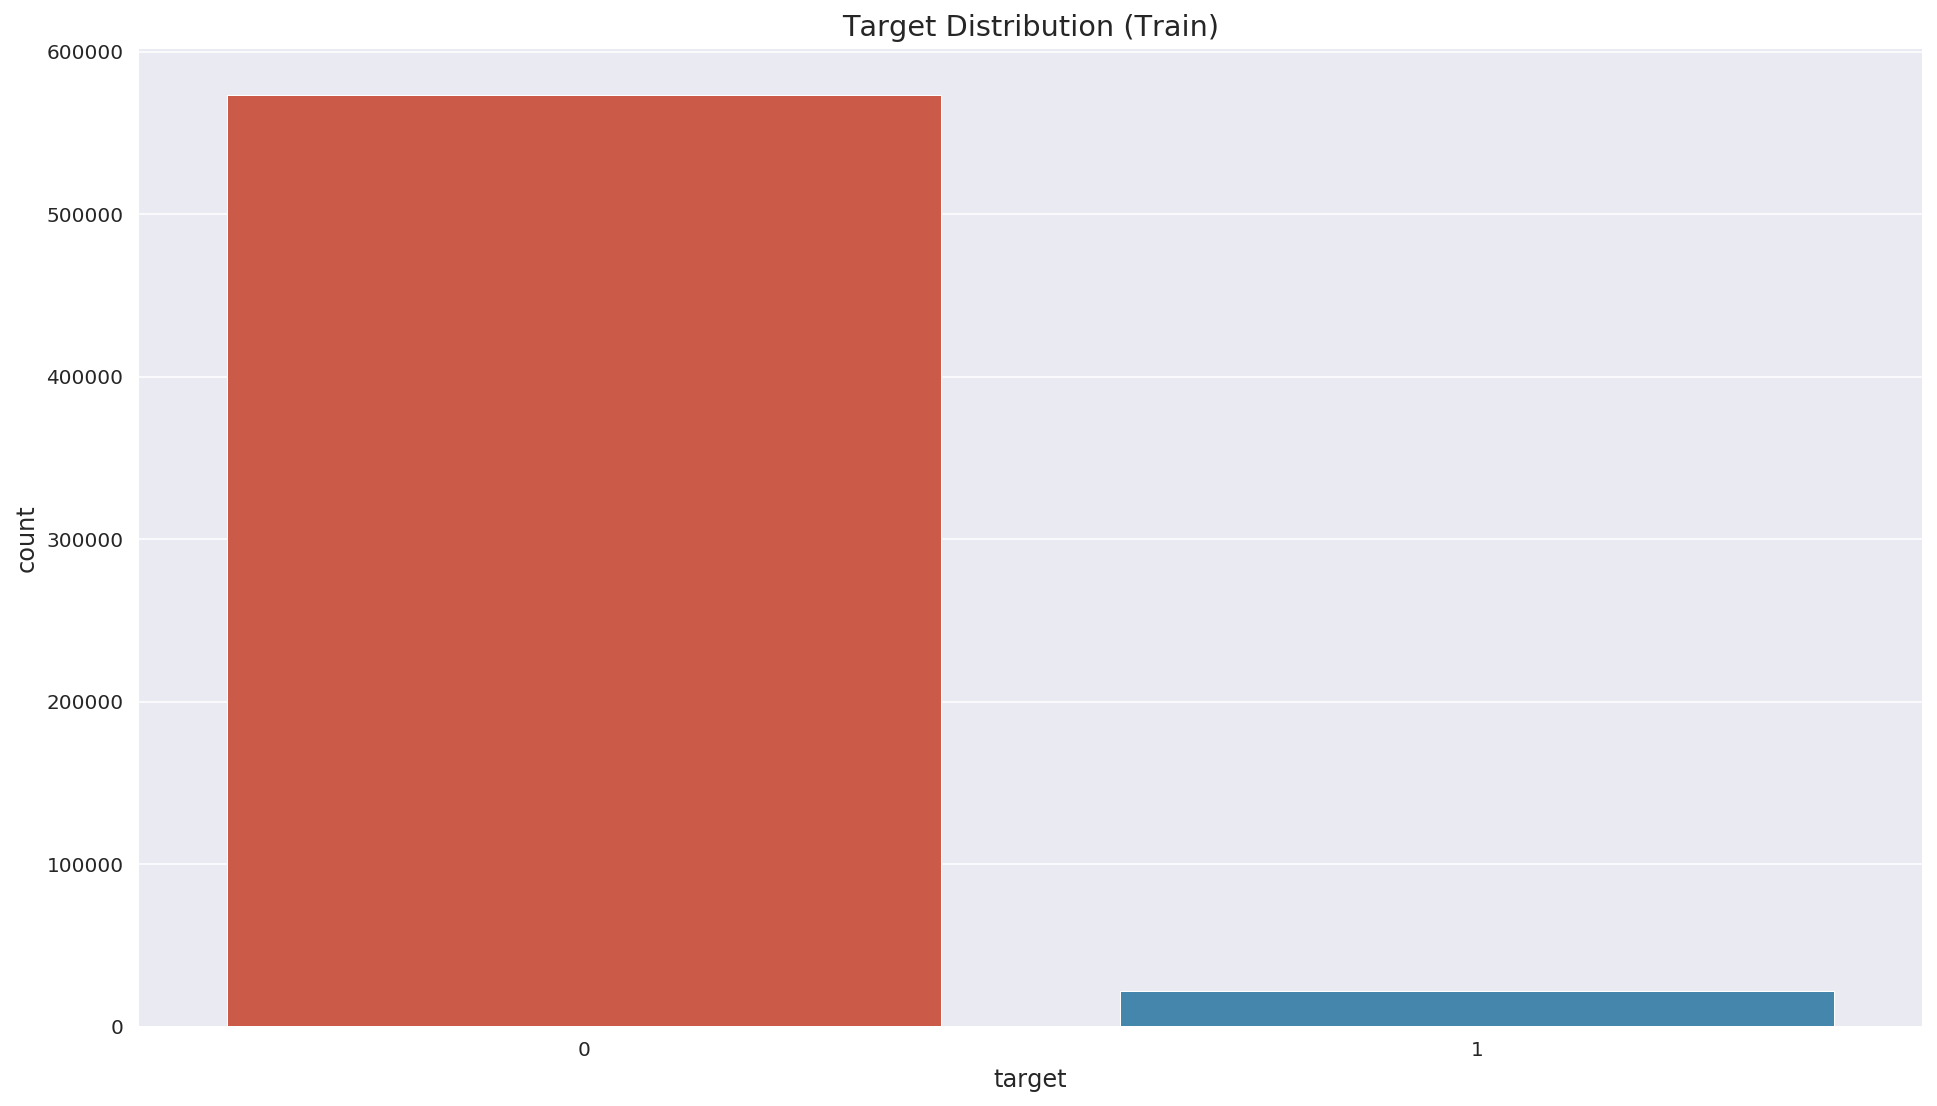

In [6]:
sns.countplot(x="target", data=train)
plt.title("Target Distribution (Train)");

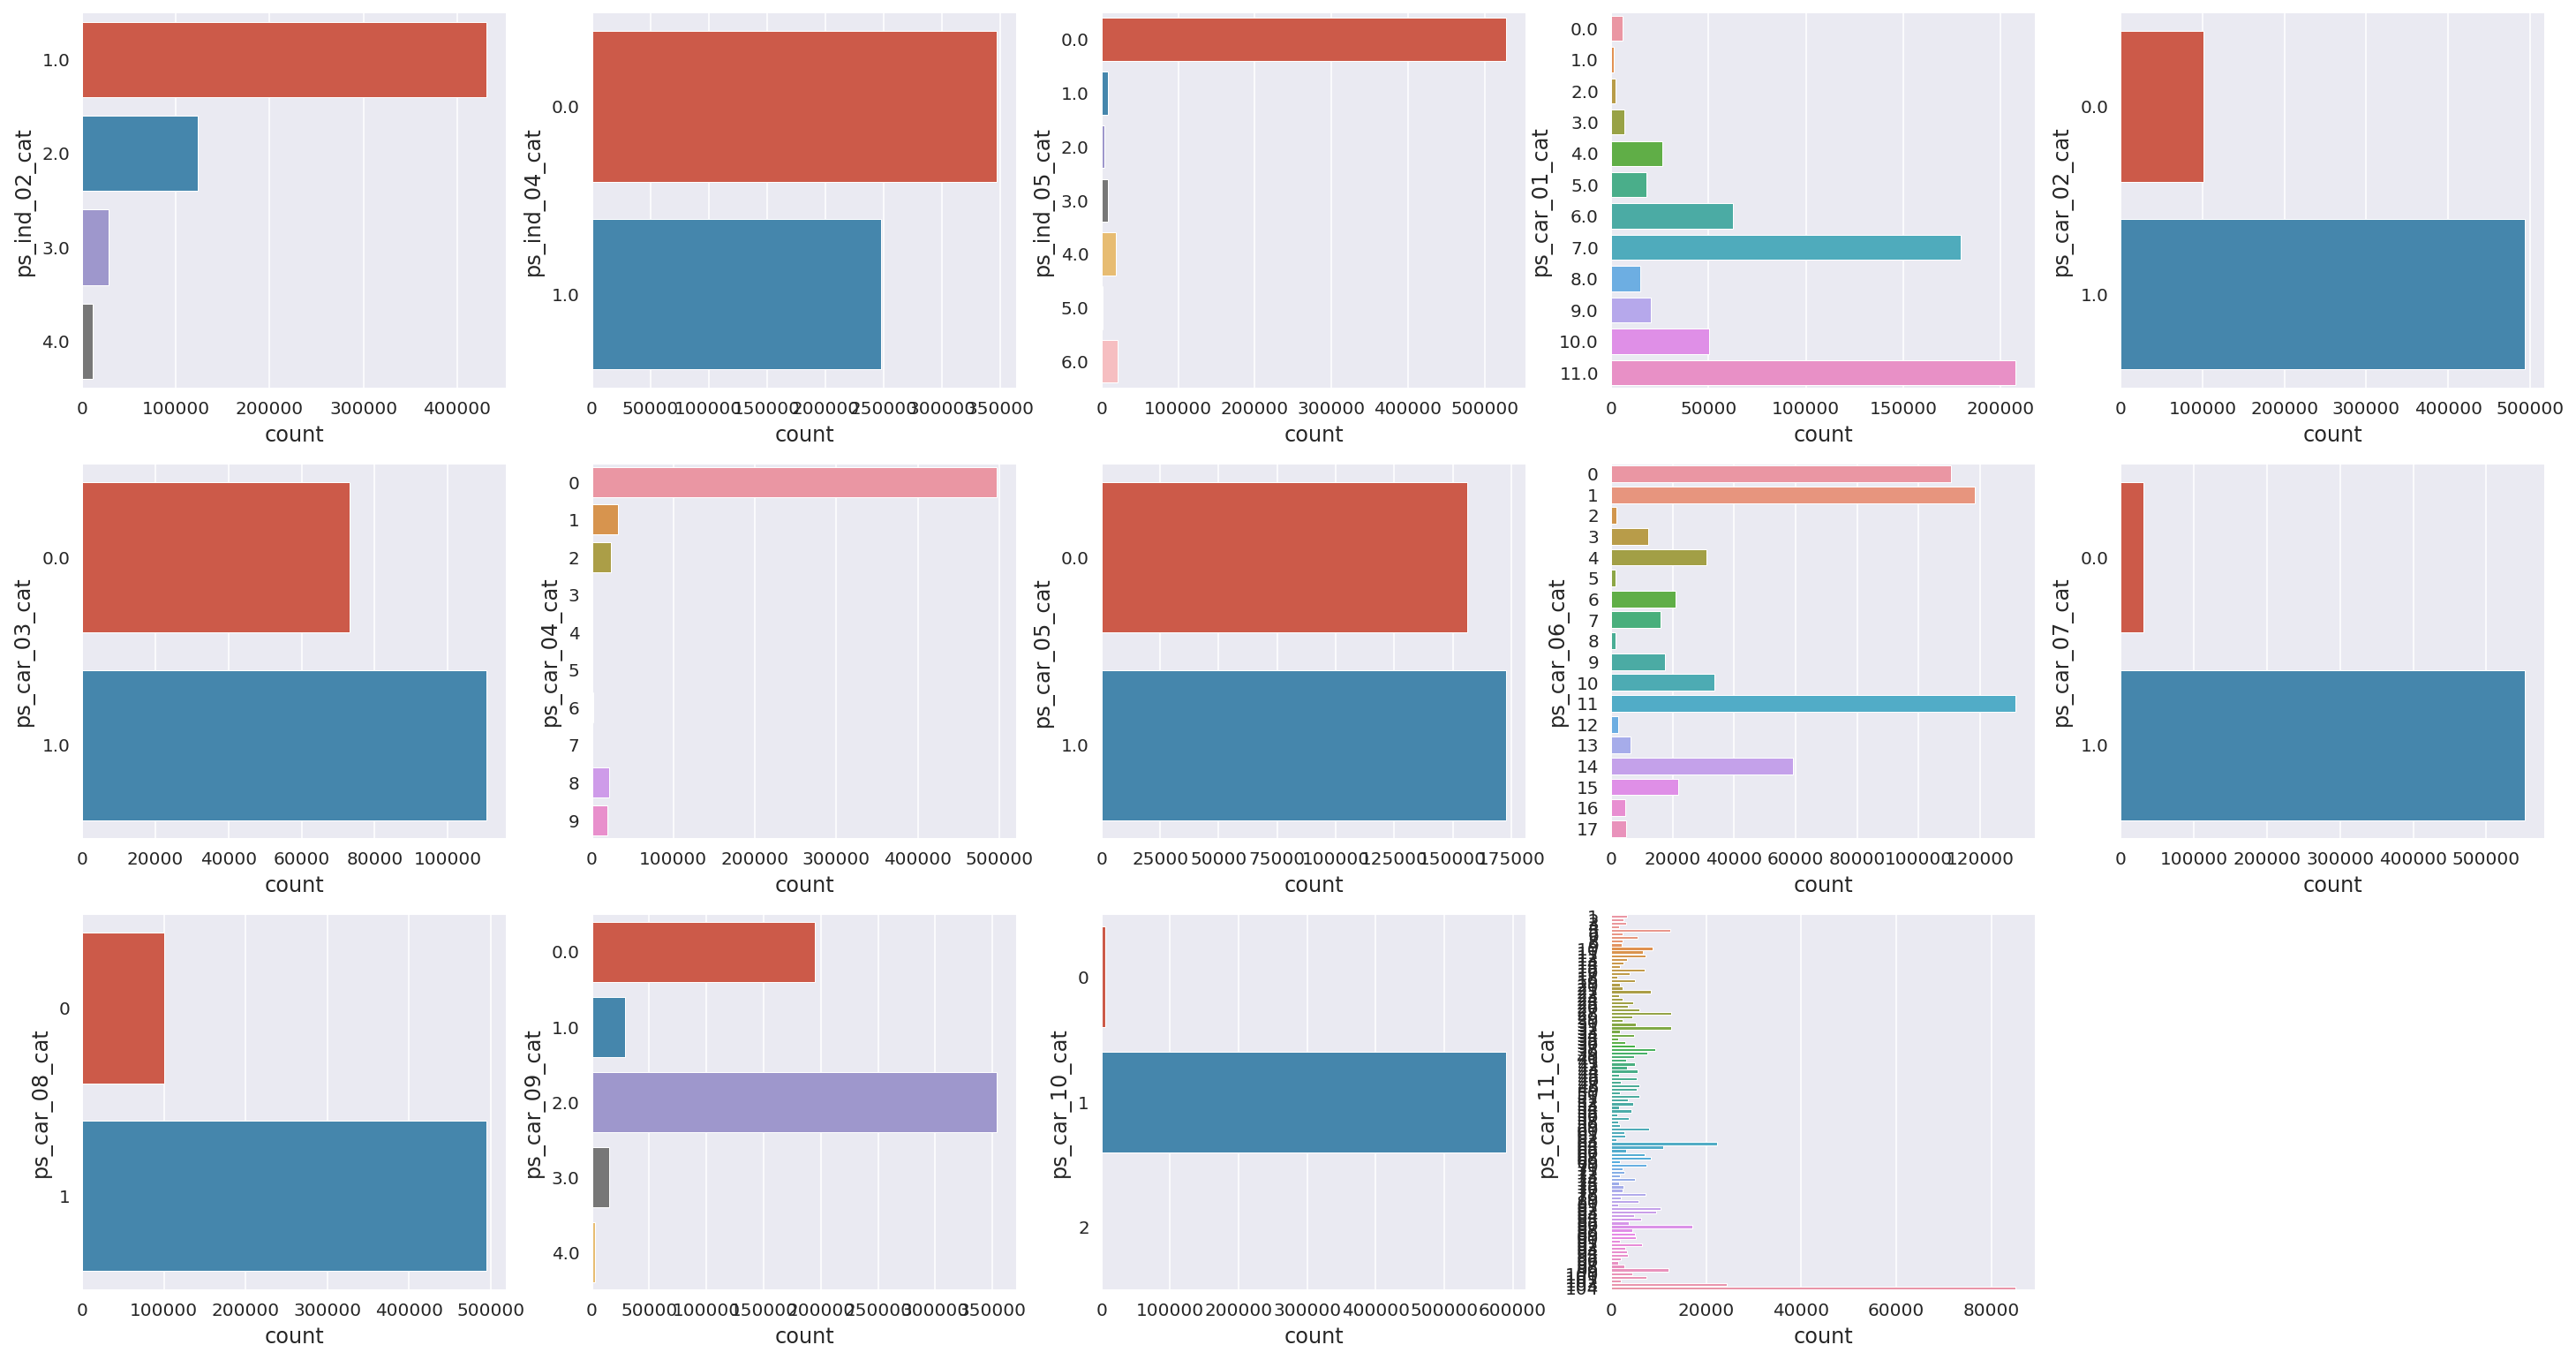

In [7]:
plt.rcParams['figure.figsize'] = 25, 18
df_aux = train.filter(regex=("_cat.*"))
df_col = df_aux.columns

fig = plt.figure()
i = 1
for feature in df_col:
    plt.subplot(4, 5, i)
    sns.countplot(y=feature, data=df_aux)
    i = i+1;

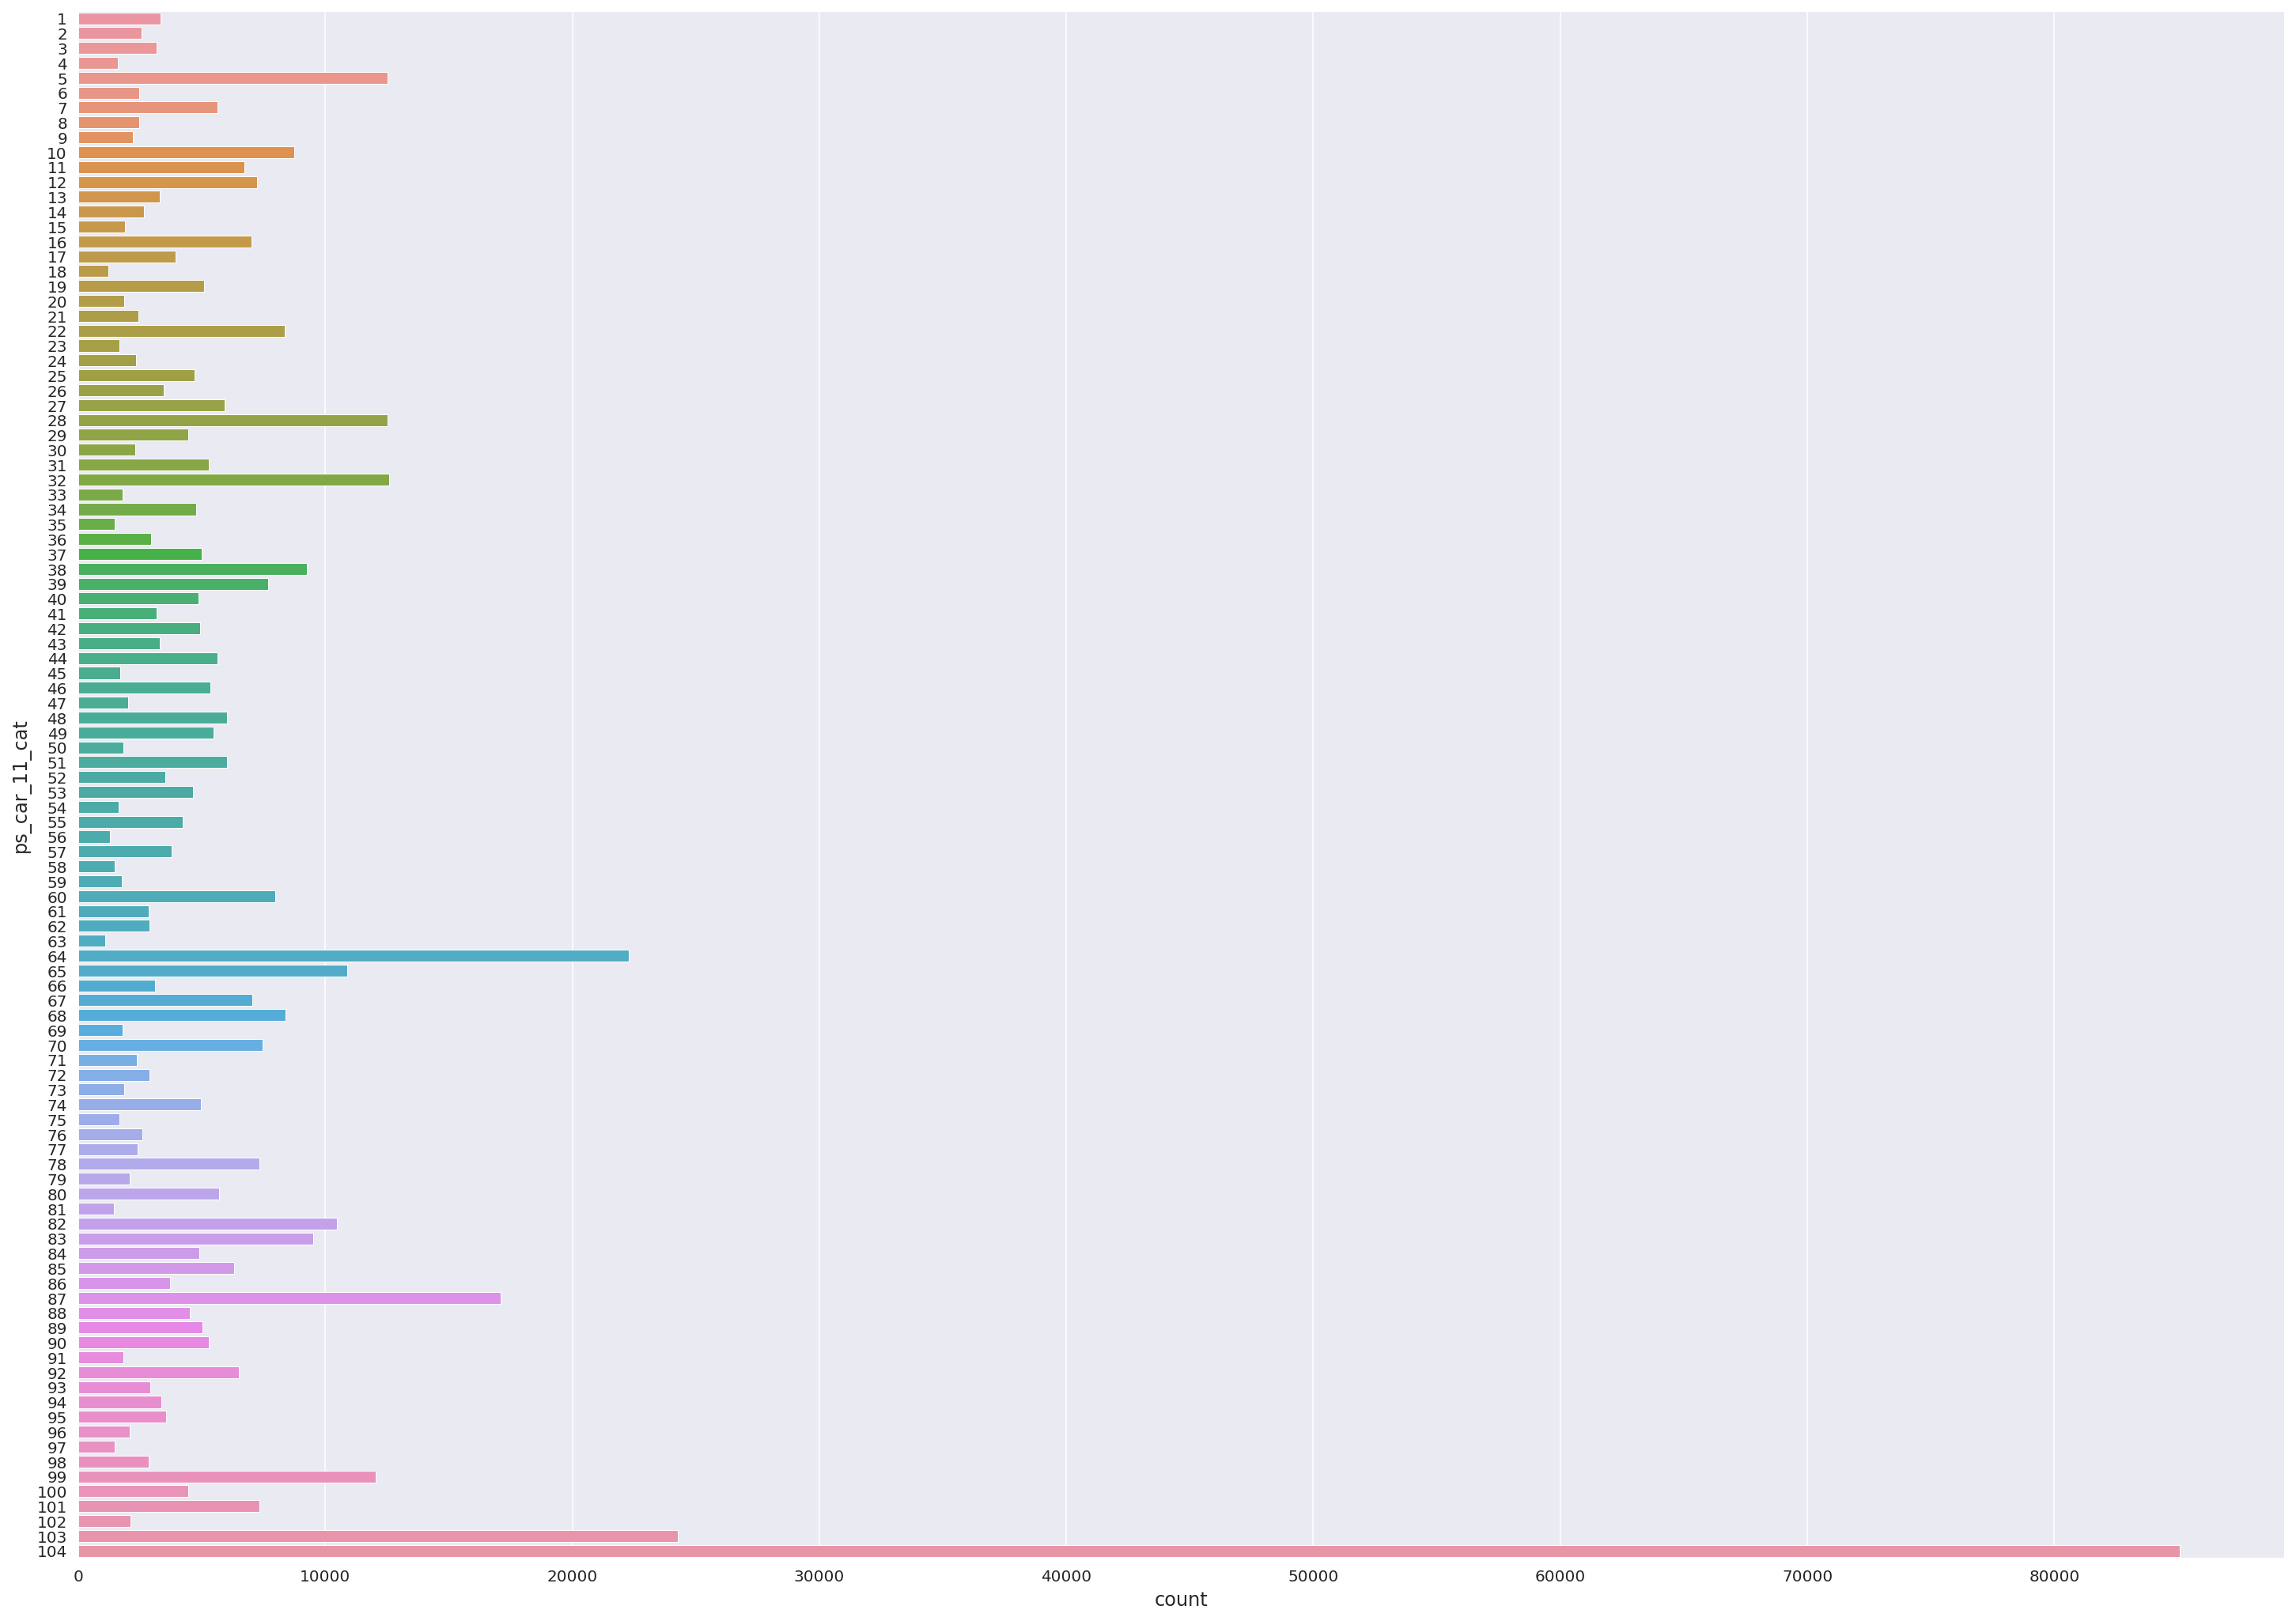

In [8]:
plt.rcParams['figure.figsize'] = 25, 18
sns.countplot(y="ps_car_11_cat", data=df_aux);

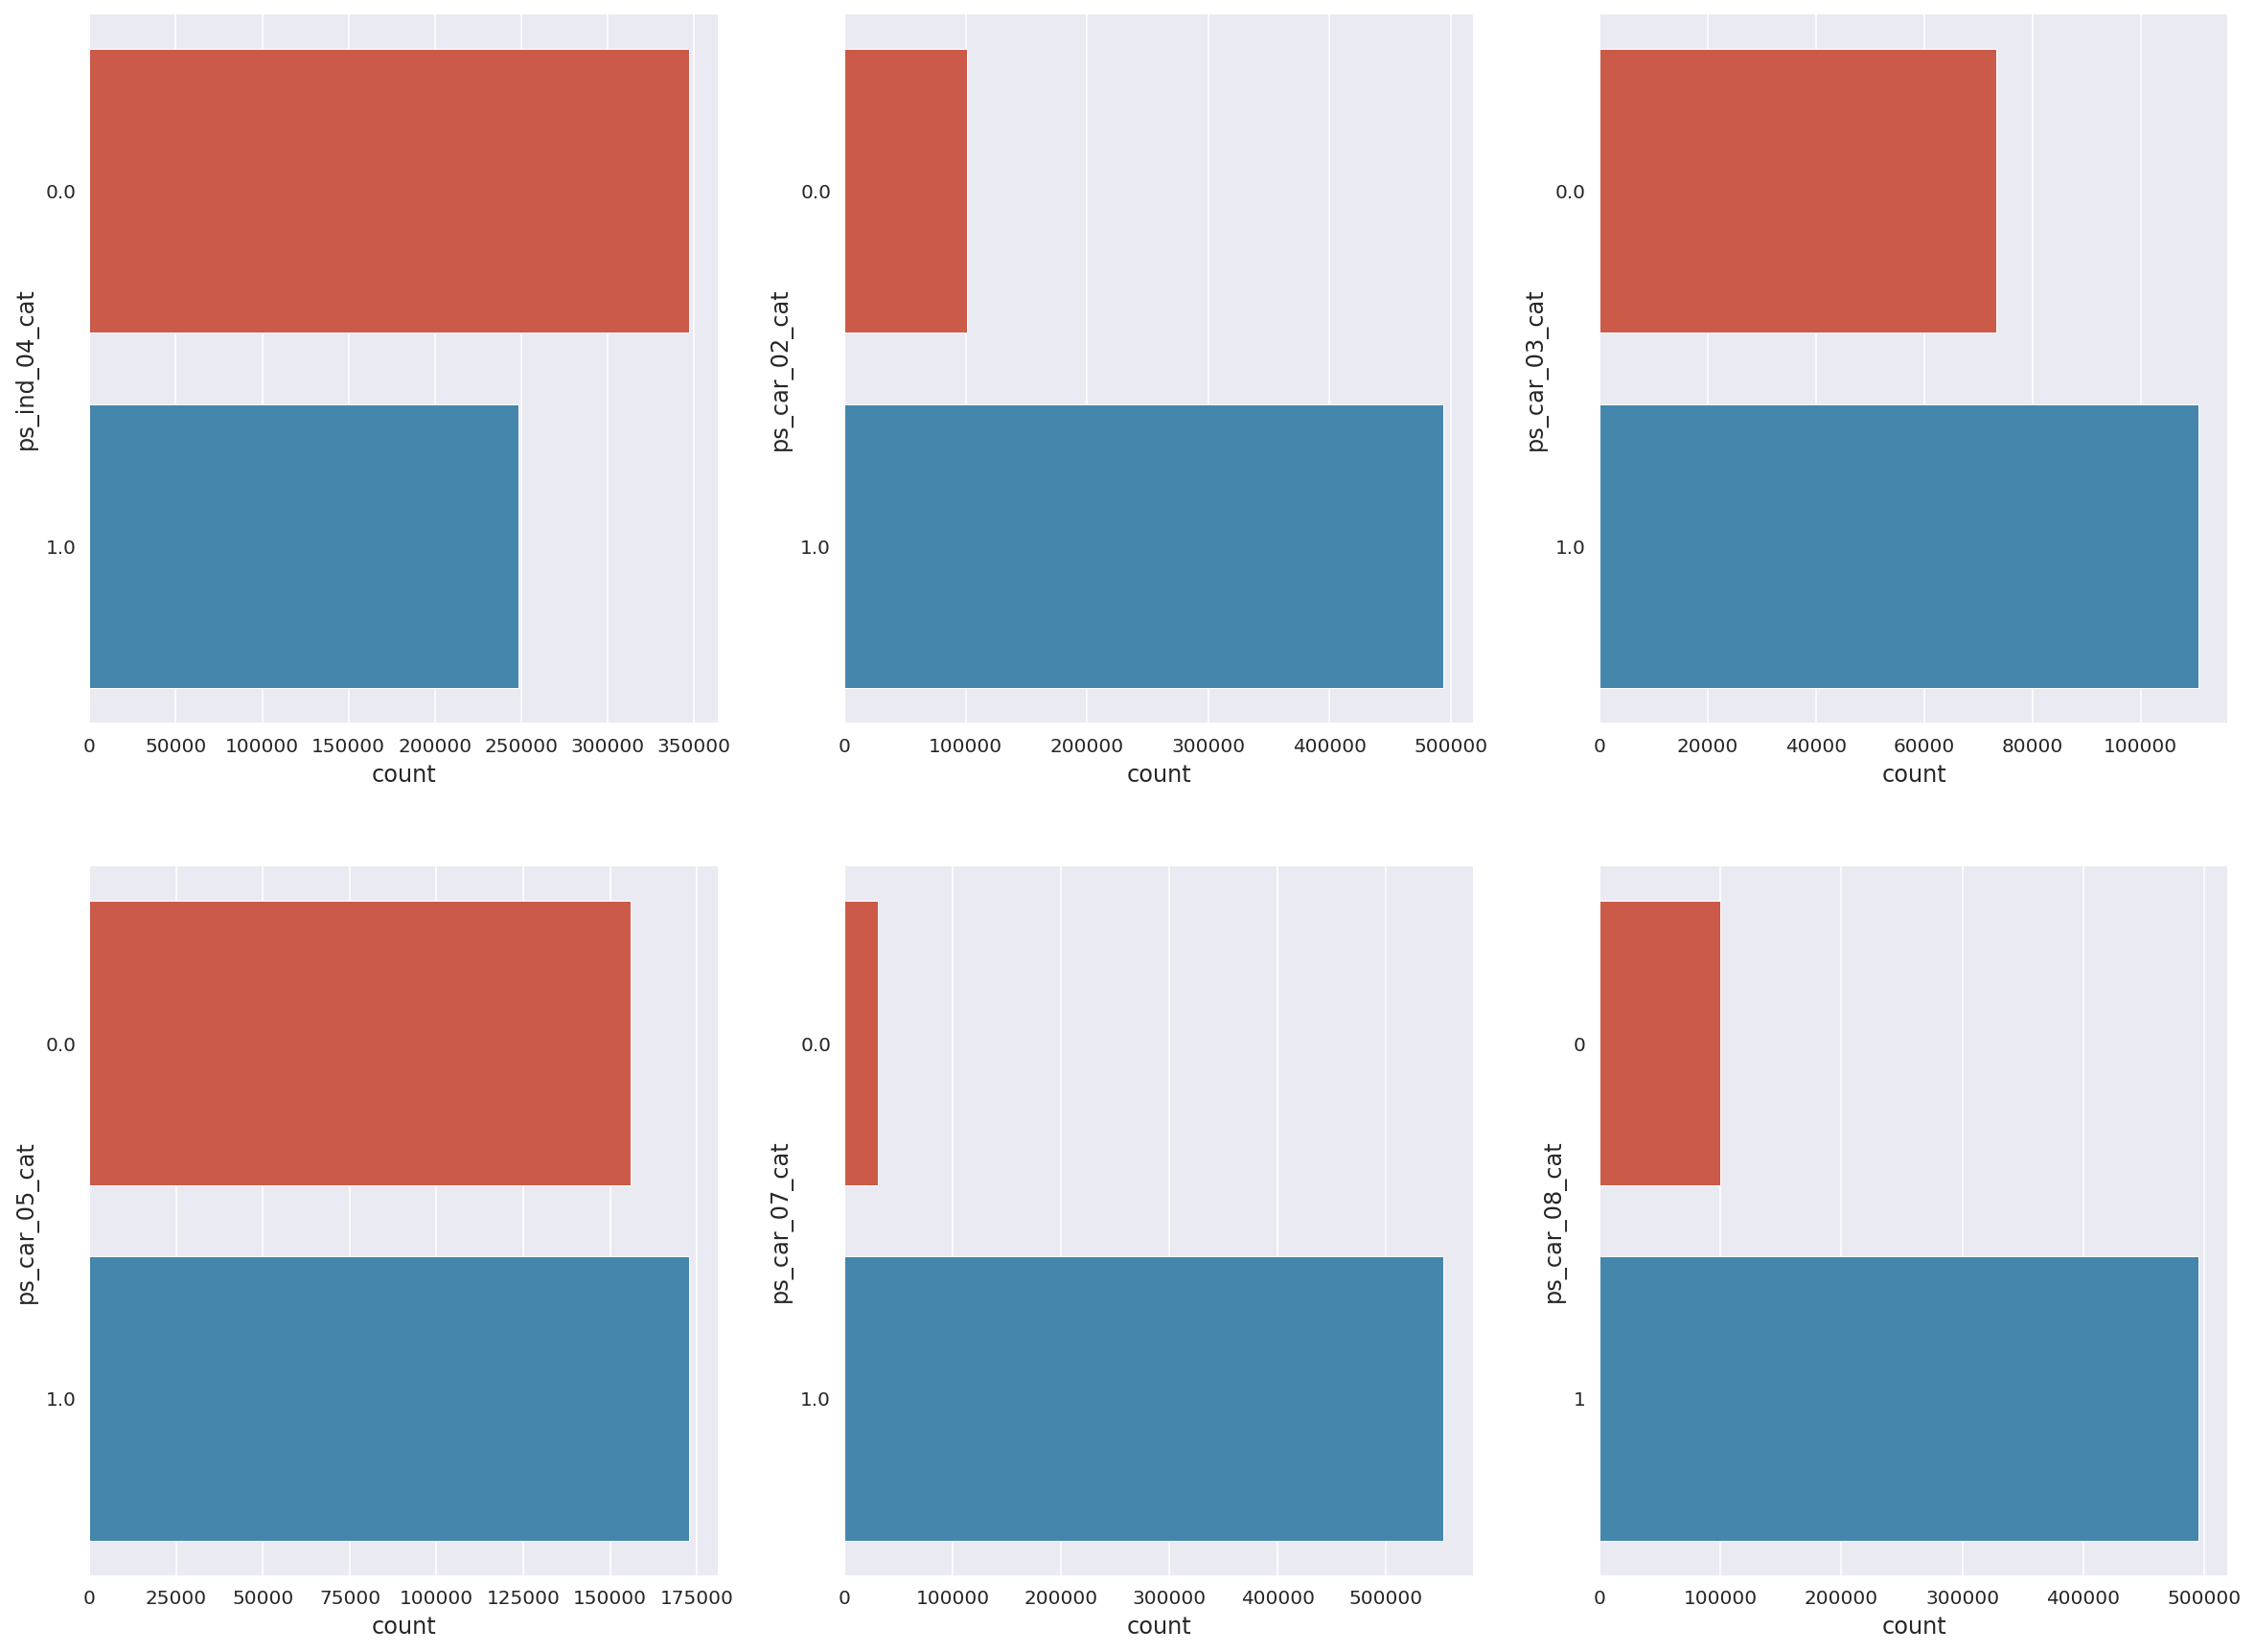

In [9]:
# Categorical features with only two values. Can we consider them binary features?
plt.rcParams['figure.figsize'] = 20, 15
df_aux = train.filter(regex=("_cat.*"))
df_col = df_aux.columns

fig = plt.figure()
i = 1
for feature in df_col:
    if df_aux[feature].value_counts().count() == 2:
        plt.subplot(2, 3, i)
        sns.countplot(y=feature, data=df_aux)
        i = i+1;